# Business Problem:
In order to effectively produce quality decisions in the modern credit card industry, knowledge must be gained through effective data analysis and modelling. Through the use of dynamic data-driven decision-making tools and procedures, information can be gathered to successfully evaluate all aspects of credit card operations. PSPD Bank has banking operations in more than 50 countries across the globe. Mr. Jim Watson, CEO, wants to evaluate areas of bankruptcy, fraud and collections, respond to customer requests for help with proactive offers and services.

Following are some of Mr. Watson's questionsn to understand the customer spend and repayment behaviour

# Import necessary libraries

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

#  Data Collection

In [3]:
#File path
customer=pd.read_csv('F:\prep\PYTHON\Credit card EDA\Customer Acqusition.csv')
repay=pd.read_csv('F:\prep\PYTHON\Credit card EDA\Repayment.csv',usecols = ["Customer","Month","Amount"])
spend=pd.read_csv('F:\prep\PYTHON\Credit card EDA\spend.csv')

In [4]:
customer=customer.drop(['No'],axis=1)
spend=spend.drop(['Sl No:'],axis=1)

In [5]:
customer.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [6]:
repay.head()

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


In [7]:
spend.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


# Exploratory Data Analysis

In [8]:
print(customer.shape)
print(repay.shape)
print(spend.shape)

(100, 7)
(1523, 3)
(1500, 4)


In [9]:
customer.dtypes

Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [10]:
repay.dtypes

Customer     object
Month        object
Amount      float64
dtype: object

In [11]:
spend.dtypes

Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [12]:
customer.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [13]:
repay.isnull().sum()

Customer    23
Month       23
Amount      23
dtype: int64

In [14]:
spend.isnull().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [16]:
# dropping null values present in 'repay' data set
repay.dropna(inplace=True)

In [17]:
repay.isnull().sum()

Customer    0
Month       0
Amount      0
dtype: int64

# (1) In the above dataset

### (a) In case age is less than 18, replace it with mean of age values.

In [18]:
mean_age_old=customer['Age'].mean()
print("The Mean of Age column is ",mean_age_old)

The Mean of Age column is  46.49


In [19]:
#replacing age less than 18 with mean of age values
customer.loc[customer["Age"]<18,"Age"]=customer["Age"].mean()

In [20]:
mean_age_new=customer["Age"].mean()
print("The new mean of Age column is ", mean_age_new)

The new mean of Age column is  48.399399999999986


##### Hence,All the customers who have age less than 18 have been replaced by mean of the age column.

### (b) In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
##### (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [21]:
customer.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [22]:
spend.head(2)

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13


In [23]:
#merging customer and spend table on the basis of "Customer" column
customer_spend=pd.merge(left=customer,right=spend,on="Customer",how="inner")

In [24]:
customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07


In [25]:
customer_spend.shape

(1500, 10)

In [26]:
#all the customers whose spend amount is more than the limit,replacing with 50% of that customer’s limit
customer_spend[customer_spend["Amount"]>customer_spend["Limit"]]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,RENTAL,199554.72
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,TRAIN TICKET,376887.49
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,BUS TICKET,439648.53
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,PETRO,384078.73
22,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...
1486,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,30-Mar-06,RENTAL,483886.62
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


In [27]:
#if customer's spend amount is more than the limit,replacing with 50% of that customer’s limit
customer_spend.loc[customer_spend["Amount"]>customer_spend["Limit"],"Amount"]=(50*customer_spend['Limit']).div(100)

In [28]:
customer_spend[customer_spend['Amount']>customer_spend['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount


##### Hence,there are no customers left whose spend amount is more than the limit

### (c) Incase the repayment amount is more than the limit, replace the repayment with the limit

In [29]:
customer.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [30]:
repay.head()

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


In [31]:
#merging customer and repay table on the basis of "Customer" column
customer_repay=pd.merge(left=customer,right=repay,on='Customer', how='inner')

In [32]:
customer_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88


In [33]:
#all the customers where repayment amount is more than the limit.
customer_repay[customer_repay['Amount']>customer_spend['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,185955.07
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,412783.34
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,148038.67
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,179144.68
23,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Aug-05,381635.66
...,...,...,...,...,...,...,...,...,...
1486,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,30-Mar-06,462283.02
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,310992.30
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,121874.90
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,337815.57


In [34]:
#customers where repayment amount is more than the limit, replacing the repayment with the limit.
customer_repay.loc[customer_repay['Amount']>customer_repay['Limit'],'Amount']=customer_repay['Limit']

In [35]:
customer_repay[customer_repay["Amount"] > customer_repay["Limit"]]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount


##### Hence, there are no customers left where repayment amount is more than the limit.

# (2) From the above dataset create the following summaries:

### (a) How many distinct customers exist?

In [36]:
distinct_customer=customer["Customer"].nunique()

In [37]:
print('The number of distinct customers are',distinct_customer)

The number of distinct customers are 100


### (b) How many distinct categories exist?

In [38]:
#customers from different segments
customer['Segment'].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

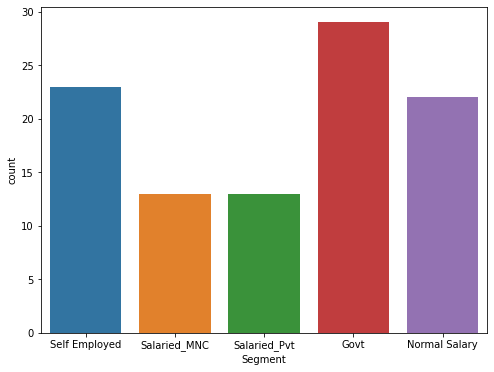

In [39]:
plt.figure(figsize=(8,6))
sns.countplot('Segment',data=customer)
plt.show()

In [40]:
print("We can see from the countplot that number of distinct categories are", len(customer['Segment'].value_counts()))

We can see from the countplot that number of distinct categories are 5


### (c) What is the average monthly spend by customers?

In [41]:
spend.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


In [42]:
#converting Month column of "spend" table to date time format
spend['Month'] = pd.to_datetime(spend['Month'])

In [43]:
spend.head()

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07


In [44]:
#creating new columns which show "Month" and "Year"
spend['Monthly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spend['Yearly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [45]:
spend.head()

,Customer,Month,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-25,FOOD,484342.47,January,2004
4,A1,2005-01-17,CAMERA,369694.07,January,2005


In [46]:
#grouping the dataset based on 'Yearly' and 'monthly'
customer_spend_group=round(spend.groupby(["Yearly","Monthly"]).mean(),2)
customer_spend_group

Amount
Yearly Monthly             
2004   April      235272.04
       February   221215.27
       January    251712.07
       March      232146.12
       May        217539.24
       November   270486.40
       September  310923.38
2005   April      252181.33
       August     233734.63
       December   147503.06
       February   229802.28
       January    292741.37
       July       229116.66
       June       262688.11
       May        245696.52
       November   286143.32
       October    194568.64
       September  188666.20
2006   April      232468.97
       August     240699.72
       December   270470.98
       February   253858.26
       January    282058.01
       July       287505.10
       June       177252.39
       March      247166.08
       May        236162.74
       November   182841.29
       October    236136.34
       September  158520.09

### (d) What is the average monthly repayment by customers?

In [47]:
repay.head()

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


In [48]:
#coverting "Month" column to date time format
repay['Month']=pd.to_datetime(repay['Month'])

In [49]:
repay.head()

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88


In [50]:
repay.dtypes

Customer            object
Month       datetime64[ns]
Amount             float64
dtype: object

In [51]:
#creating new columns which show "Month" and "Year"
repay["Monthly"]=repay["Month"].apply(lambda x:pd.Timestamp.strftime(x,format='%B'))
repay["Yearly"]=repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format='%Y'))

In [52]:
repay.head()

,Customer,Month,Amount,Monthly,Yearly
0,A1,2004-01-12,495414.75,January,2004
1,A1,2004-01-03,245899.02,January,2004
2,A1,2004-01-15,259490.06,January,2004
3,A1,2004-01-25,437555.12,January,2004
4,A1,2005-01-17,165972.88,January,2005


In [53]:
customer_repay_group=round(repay.groupby(['Yearly','Monthly']).mean(),2)
customer_repay_group

Amount
Yearly Monthly             
2004   April      259141.68
       February   256702.63
       January    243489.65
       March      252585.28
       May        226162.72
       November   209592.24
       September  184487.85
2005   April      212688.63
       August     264430.92
       December   320379.34
       February   238829.27
       January    240548.10
       July       239871.48
       June       210199.82
       May        263207.37
       November   256695.12
       October    219849.96
       September  247700.17
2006   April      275472.25
       August     224143.99
       December   252736.57
       February   284489.57
       January    293475.39
       July       257936.38
       June       251990.45
       March      240851.27
       May        256920.88
       November   199399.20
       October    260765.48
       September  262533.88

### (e) If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [54]:
#merging all the three tables. Alreaady merged customer and spend table in 'customer_spend'. Using "customer_spend" and "repay"
#table to form the final "customer_spend_repay" table
customer_spend_repay=pd.merge(left=customer_spend,right=repay,on="Customer",how='inner')
customer_spend_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-12,495414.75,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-03,245899.02,January,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-15,259490.06,January,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-25,437555.12,January,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2005-01-17,165972.88,January,2005


In [55]:
customer_spend_repay.rename(columns={'Amount_x':'Spend_Amount','Amount_y':'Repay_Amount'},inplace=True)

In [56]:
customer_spend_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Spend_Amount,Month_y,Repay_Amount,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-12,495414.75,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-03,245899.02,January,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-15,259490.06,January,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-25,437555.12,January,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2005-01-17,165972.88,January,2005


In [57]:
# grouping the data based on "Yearly","Month_x" columns to get the 'Spend_Amount'and 'Repay_Amount'
interest_group=customer_spend_repay.groupby(['Yearly',"Monthly"])['Spend_Amount','Repay_Amount'].sum()
interest_group

Spend_Amount  Repay_Amount
Yearly Monthly                              
2004   April      1.194516e+08  2.285403e+08
       February   7.613922e+07  1.602419e+08
       January    1.088357e+09  1.699210e+09
       March      5.594171e+07  8.974470e+07
       May        8.800456e+07  1.411594e+08
       November   5.504612e+07  7.860290e+07
       September  5.144278e+07  8.016122e+07
2005   April      9.366405e+07  1.747894e+08
       August     1.361400e+08  2.477449e+08
       December   4.348638e+07  9.944533e+07
       February   5.890557e+08  9.416163e+08
       January    1.324129e+08  1.810333e+08
       July       3.995653e+07  7.997268e+07
       June       1.174019e+08  2.213774e+08
       May        7.149030e+08  1.099197e+09
       November   1.532278e+08  2.763119e+08
       October    3.140993e+07  6.027830e+07
       September  3.195551e+07  7.530449e+07
2006   April      3.229722e+08  6.093666e+08
       August     5.849630e+07  7.167032e+07
       December   4.585222e+07  7.087702e+07
       February   1.654843e+08  2.903280e+08
       January    5.127574e+07  8.974491e+07
       July       1.444093e+08  2.245720e+08
       June       5.302118e+07  6.914431e+07
       March      7.393854e+08  1.115725e+09
       May        3.297954e+08  5.434823e+08
       November   1.124836e+08  1.355832e+08
       October    5.285823e+07  7.890924e+07
       September  5.395681e+07  8.083199e+07

In [58]:
 # Monthly Profit = Monthly repayment – Monthly spend.
interest_group['Monthly Profit']=interest_group['Repay_Amount']-interest_group['Spend_Amount']
interest_group

Spend_Amount  Repay_Amount  Monthly Profit
Yearly Monthly                                              
2004   April      1.194516e+08  2.285403e+08    1.090887e+08
       February   7.613922e+07  1.602419e+08    8.410268e+07
       January    1.088357e+09  1.699210e+09    6.108525e+08
       March      5.594171e+07  8.974470e+07    3.380298e+07
       May        8.800456e+07  1.411594e+08    5.315485e+07
       November   5.504612e+07  7.860290e+07    2.355678e+07
       September  5.144278e+07  8.016122e+07    2.871844e+07
2005   April      9.366405e+07  1.747894e+08    8.112539e+07
       August     1.361400e+08  2.477449e+08    1.116049e+08
       December   4.348638e+07  9.944533e+07    5.595895e+07
       February   5.890557e+08  9.416163e+08    3.525606e+08
       January    1.324129e+08  1.810333e+08    4.862042e+07
       July       3.995653e+07  7.997268e+07    4.001615e+07
       June       1.174019e+08  2.213774e+08    1.039755e+08
       May        7.149030e+08  1.099197e+09    3.842944e+08
       November   1.532278e+08  2.763119e+08    1.230841e+08
       October    3.140993e+07  6.027830e+07    2.886837e+07
       September  3.195551e+07  7.530449e+07    4.334898e+07
2006   April      3.229722e+08  6.093666e+08    2.863944e+08
       August     5.849630e+07  7.167032e+07    1.317402e+07
       December   4.585222e+07  7.087702e+07    2.502480e+07
       February   1.654843e+08  2.903280e+08    1.248436e+08
       January    5.127574e+07  8.974491e+07    3.846917e+07
       July       1.444093e+08  2.245720e+08    8.016271e+07
       June       5.302118e+07  6.914431e+07    1.612313e+07
       March      7.393854e+08  1.115725e+09    3.763400e+08
       May        3.297954e+08  5.434823e+08    2.136869e+08
       November   1.124836e+08  1.355832e+08    2.309955e+07
       October    5.285823e+07  7.890924e+07    2.605102e+07
       September  5.395681e+07  8.083199e+07    2.687518e+07

In [59]:
#interest earned is 2.9% of Monthly Profit
interest_group['Interest Earned']=(2.9*interest_group['Monthly Profit'])/100
interest_group

Spend_Amount  Repay_Amount  Monthly Profit  Interest Earned
Yearly Monthly                                                               
2004   April      1.194516e+08  2.285403e+08    1.090887e+08     3.163572e+06
       February   7.613922e+07  1.602419e+08    8.410268e+07     2.438978e+06
       January    1.088357e+09  1.699210e+09    6.108525e+08     1.771472e+07
       March      5.594171e+07  8.974470e+07    3.380298e+07     9.802865e+05
       May        8.800456e+07  1.411594e+08    5.315485e+07     1.541491e+06
       November   5.504612e+07  7.860290e+07    2.355678e+07     6.831466e+05
       September  5.144278e+07  8.016122e+07    2.871844e+07     8.328349e+05
2005   April      9.366405e+07  1.747894e+08    8.112539e+07     2.352636e+06
       August     1.361400e+08  2.477449e+08    1.116049e+08     3.236542e+06
       December   4.348638e+07  9.944533e+07    5.595895e+07     1.622810e+06
       February   5.890557e+08  9.416163e+08    3.525606e+08     1.022426e+07
       January    1.324129e+08  1.810333e+08    4.862042e+07     1.409992e+06
       July       3.995653e+07  7.997268e+07    4.001615e+07     1.160468e+06
       June       1.174019e+08  2.213774e+08    1.039755e+08     3.015290e+06
       May        7.149030e+08  1.099197e+09    3.842944e+08     1.114454e+07
       November   1.532278e+08  2.763119e+08    1.230841e+08     3.569438e+06
       October    3.140993e+07  6.027830e+07    2.886837e+07     8.371827e+05
       September  3.195551e+07  7.530449e+07    4.334898e+07     1.257121e+06
2006   April      3.229722e+08  6.093666e+08    2.863944e+08     8.305437e+06
       August     5.849630e+07  7.167032e+07    1.317402e+07     3.820465e+05
       December   4.585222e+07  7.087702e+07    2.502480e+07     7.257193e+05
       February   1.654843e+08  2.903280e+08    1.248436e+08     3.620465e+06
       January    5.127574e+07  8.974491e+07    3.846917e+07     1.115606e+06
       July       1.444093e+08  2.245720e+08    8.016271e+07     2.324719e+06
       June       5.302118e+07  6.914431e+07    1.612313e+07     4.675707e+05
       March      7.393854e+08  1.115725e+09    3.763400e+08     1.091386e+07
       May        3.297954e+08  5.434823e+08    2.136869e+08     6.196920e+06
       November   1.124836e+08  1.355832e+08    2.309955e+07     6.698869e+05
       October    5.285823e+07  7.890924e+07    2.605102e+07     7.554795e+05
       September  5.395681e+07  8.083199e+07    2.687518e+07     7.793803e+05

### (f) What are the top 5 product types

In [60]:
spend.head()

,Customer,Month,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-25,FOOD,484342.47,January,2004
4,A1,2005-01-17,CAMERA,369694.07,January,2005


In [61]:
#top 5 product types on which customer is spending
spend['Type'].value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

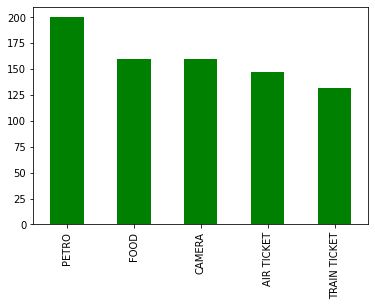

In [62]:
spend["Type"].value_counts().head(5).plot(kind='bar',color="green")
plt.show()

### (g) Which city is having maximum spend?

In [63]:
customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07


In [64]:
city_spend=customer_spend.groupby(['City'])["Amount"].sum().sort_values(ascending=False)
city_spend

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

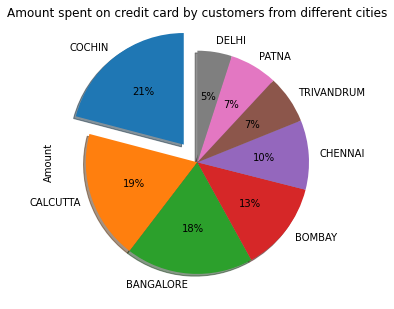

In [65]:
plt.figure(figsize=(5,10))
city_spend.plot(kind='pie',shadow=True,autopct='%1.0f%%',labeldistance=1.1,explode=[0.2,0,0,0,0,0,0,0],startangle=90)
plt.title("Amount spent on credit card by customers from different cities")
plt.show()

##### From above pie chart we can see that Cochin is having maximum spend.

### (h) Which age group is spending more money?

In [66]:
#creating new column "Age Group" with 8 bins between 18 to 88 
customer_spend['Age Group'] =  pd.cut(customer_spend['Age'],bins=np.arange(18,88,8),
                                      labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"],
                                      include_lowest=True)


In [67]:
customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,74-82
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13,74-82
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,74-82
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47,74-82
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07,74-82


In [68]:
#grouping data based on "Age Group" and finding the amount spend by each age group and arranging in descending oreder
age_spend=customer_spend.groupby(['Age Group'])['Amount'].sum().sort_values(ascending=False)
age_spend

Age Group
42-50    53242390.70
34-42    38037826.50
26-34    30553459.81
18-26    25233896.65
50-58    22454066.68
74-82    19770884.32
66-74    17705877.44
58-66    12782683.13
Name: Amount, dtype: float64

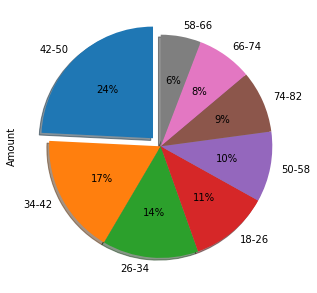

In [69]:
plt.figure(figsize=(5,10))
age_spend.plot(kind="pie",shadow=True,startangle=90,autopct='%1.0f%%',explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.show()

###### From the pie chart shown above we can say that age group 42 - 50 is spending more money

### (i) Who are the top 10 customers in terms of repayment?

In [70]:
customer_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88


In [71]:
#grouping based on "Customer" column to find top 10 customers
customer_repay.groupby(['Customer'])[['Amount']].sum().sort_values(by="Amount",ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


# (3) Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [72]:
customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,74-82
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13,74-82
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,74-82
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47,74-82
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07,74-82


In [73]:
#converting "Month" column to date time 
customer_spend['Month']=pd.to_datetime(customer_spend['Month'])

In [74]:
#creating new column "year" 
customer_spend['Year']=customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format='%Y'))
customer_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group,Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,50-58,2004
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,50-58,2004
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,50-58,2004
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,34-42,2004


In [75]:
customer_spend_pivot=pd.pivot_table(data=customer_spend,index=['City','Year'],columns='Product',
                                   aggfunc='sum',values="Amount")
customer_spend_pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

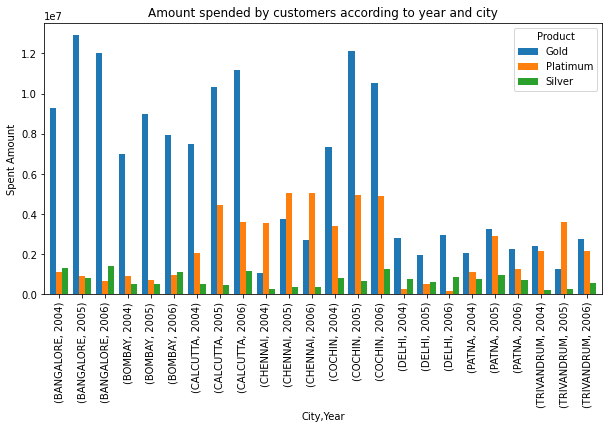

In [77]:
customer_spend_pivot.plot(kind="bar",figsize=(10,5),width=0.8)
plt.ylabel("Spent Amount")
plt.title("Amount spended by customers according to year and city")
plt.show()


# (4) Create graphs for

### (a) Monthly comparison of total spends, city wise

In [78]:
customer_spend.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group,Year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004


In [79]:
#creating new column "Monthly" 
customer_spend["Monthly"]=customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format='%B'))
customer_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group,Year,Monthly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004,January
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004,January
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,50-58,2004,January
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,50-58,2004,January
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,50-58,2004,January
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,34-42,2004,January


In [80]:
#grouping data based on "Monthly" and "City" columns
month_city=customer_spend.groupby(['Monthly','City'])['Amount'].sum().sort_index().reset_index()
month_city

,Monthly,City,Amount
0,April,BANGALORE,4207980.48
1,April,BOMBAY,1873785.01
2,April,CALCUTTA,3457507.95
3,April,CHENNAI,2518656.99
4,April,COCHIN,3882744.94
...,...,...,...
91,September,CHENNAI,745759.40
92,September,COCHIN,1382242.90
93,September,DELHI,50001.00
94,September,PATNA,70329.95


In [81]:
#creating pivot table based on "Monthly" and "City" columns
month_city_pivot=pd.pivot_table(data=customer_spend,index='City',columns='Monthly',aggfunc='sum',values='Amount')
month_city_pivot

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


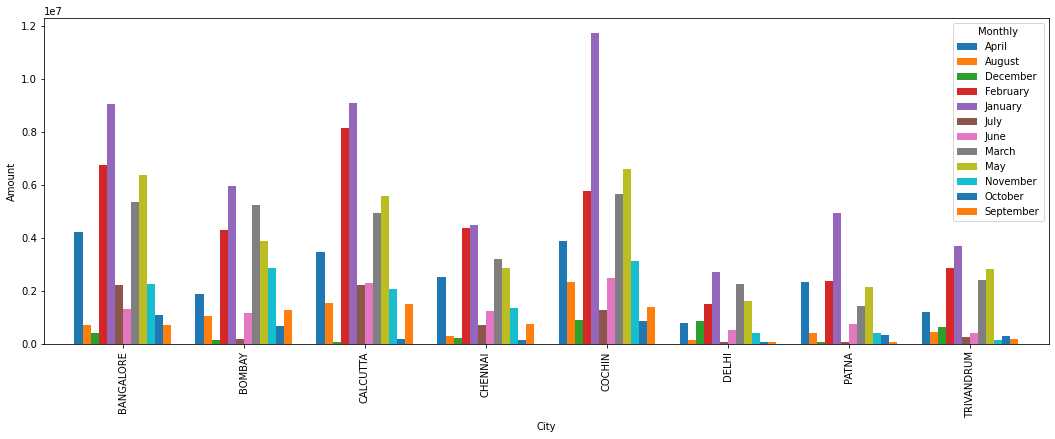

In [82]:
month_city_pivot.plot(kind="bar",figsize=(18,6),width=0.8)
plt.ylabel('Amount')
plt.show()

### (b) Comparison of yearly spend on air tickets

In [83]:
customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group,Year,Monthly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004,January
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004,January
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005,January


In [84]:
air_tickets=customer_spend.groupby(['Type','Year'])['Amount'].sum().reset_index()
air_tickets.head(5)

,Type,Year,Amount
0,AIR TICKET,2004,4357225.35
1,AIR TICKET,2005,10550152.21
2,AIR TICKET,2006,5248469.56
3,AUTO,2004,254745.28
4,AUTO,2005,1192725.78


In [85]:
filtered=air_tickets.loc[air_tickets['Type']=='AIR TICKET']
filtered

,Type,Year,Amount
0,AIR TICKET,2004,4357225.35
1,AIR TICKET,2005,10550152.21
2,AIR TICKET,2006,5248469.56


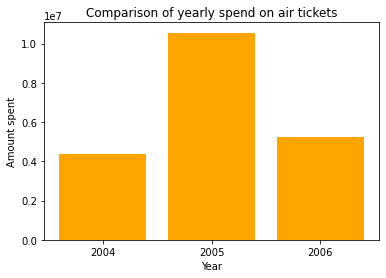

In [86]:
plt.bar(filtered['Year'],height=filtered['Amount'],color='orange')
plt.xlabel('Year')
plt.ylabel('Amount spent')
plt.title("Comparison of yearly spend on air tickets")
plt.show()

### (c) Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [87]:
customer_spend.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group,Year,Monthly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004,January


In [88]:
#creating pivot table based on "Monthly" and "Product" columns
product_wise=pd.pivot_table(data=customer_spend,index='Product',columns='Monthly',values='Amount',aggfunc='sum')
product_wise

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


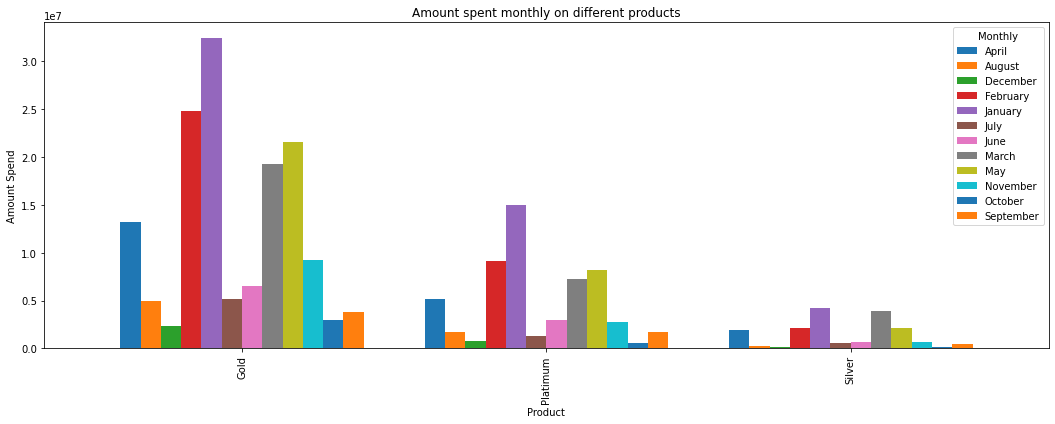

In [90]:
product_wise.plot(kind="bar",figsize=(18,6),width=0.8)
plt.ylabel("Amount Spend")
plt.title("Amount spent monthly on different products")
plt.show()

#### We can see from the above graph that the sales are high for all the Products during the months:

- January
- February
- March
- April
- May
#### Out of these months,highest sales are in January

### (5) Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [91]:
customer['Product'].unique()

array(['Gold', 'Silver', 'Platimum'], dtype=object)

In [92]:
customer_repay.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02


In [93]:
# converting 'Month' column to date time format
customer_repay['Month'] = pd.to_datetime(customer_repay['Month'])

In [94]:
#creating new column "Monthly" and "Yearly" using already existing 'Month' column
customer_repay['Monthly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
customer_repay['Yearly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [95]:
def summary_report(product,timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

In [98]:
summary_report('silver','yearly')

Give the product name and timeperiod for which you want the data


Yearly                             2004        2005        2006
Product City       Customer                                    
Silver  BANGALORE  A18        491592.71   638296.41   700000.00
                   A23        664965.71  1000010.00   872925.32
                   A59        676557.50   427247.08   600018.00
                   A72        100000.00         NaN         NaN
                   A76              NaN   265619.05         NaN
                   A77              NaN         NaN     3159.62
        COCHIN     A100        69551.19         NaN         NaN
                   A25        786338.08   611555.69  1000030.00
                   A7         500005.00   422177.27   608997.87
                   A74              NaN   100002.00         NaN
                   A79              NaN         NaN   193230.31
        CALCUTTA   A2         400000.00   410274.00   200000.00
                   A58        533815.62   540173.85   411640.17
                   A73              NaN   100001.00         NaN
                   A78              NaN         NaN    55344.81
                   A87              NaN         NaN   100003.00
        BOMBAY     A22        953419.47  1141542.81   945271.83
                   A75              NaN   100003.00         NaN
                   A80              NaN         NaN   481205.64
        CHENNAI    A85              NaN         NaN   100001.00
                   A9         380193.34   500015.00   697845.29
                   A96        100000.00         NaN         NaN
        TRIVANDRUM A57       1000010.00   200002.00   655926.99
                   A68        100000.00         NaN   100000.00
                   A86              NaN         NaN   100002.00
        PATNA      A46        713614.32  1116730.89   839228.07
                   A8         800016.00   400008.00   531812.40
                   A84              NaN         NaN   100000.00
        DELHI      A24        397014.53  1184870.98   711068.52
                   A6         548574.15   427398.18   507280.51

### Thank you!